In [1]:
# import packages
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
N = 1000
D = 2

inner_radius = 5
outer_radius = 10

r1 = np.random.randn(N//2) + inner_radius
theta = 2*np.pi*np.random.randn(N//2)
x_inner = np.concatenate([[r1*np.cos(theta)], [r1*np.sin(theta)]]).T # Polar Coordinations

r2 = np.random.randn(N//2) + outer_radius
x_outter = np.concatenate([[r2*np.cos(theta)], [r2*np.sin(theta)]]).T # Polar Coordinations

In [3]:
X = np.concatenate((x_inner, x_outter))
y = np.array([0]*(N//2) + [1]*(N//2))

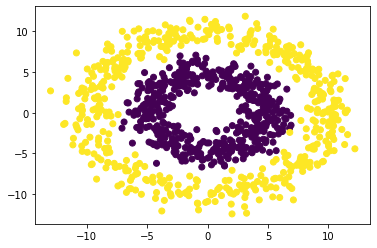

In [4]:
plt.scatter(X[:,0], X[:,1], c=y)

In [5]:
# add the radius
radius = np.hstack((r1,r2))
X = np.hstack((X,radius.reshape(N,1)))
X.shape

(1000, 3)

In [6]:
# Add the bias term
ones = np.ones((N,1))
X = np.hstack((X,ones))
X.shape

(1000, 4)

In [7]:
# Sigmoid func
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [8]:
# cost entropy func
def cost(y, a):
    return -np.mean(y*np.log(a)+(1-y)*np.log(1-a))

In [9]:
# update rule
def update_rule(x,w,error,lambda_=0.1):
    w -= lr*(np.dot(x.T, error)+lambda_*w) # Ridge Regularization
    return w

In [10]:
# Apply Gradient Descent function
def applyGD(x,y,w,lr,iterations):
    c = []
    for i in range(iterations):
        z = np.dot(x,w)
        a = sigmoid(z)
        error = a-y
        w = update_rule(x,w,error)
        c.append(cost(y,a))
        
    return c, w

In [11]:
def accuracy(y, a):
    return np.mean(y==a)

In [12]:
# Apply Gradient Descent to dataset
w = np.random.randn(X.shape[1])
lr = 0.0001
iterations = 5000

c, w = applyGD(X, y, w, lr, iterations)

In [13]:
# Accuracy
print("Training Accuracy: {}%".format(accuracy(y, np.round(sigmoid(np.dot(X,w))))*100))

Training Accuracy: 99.6%


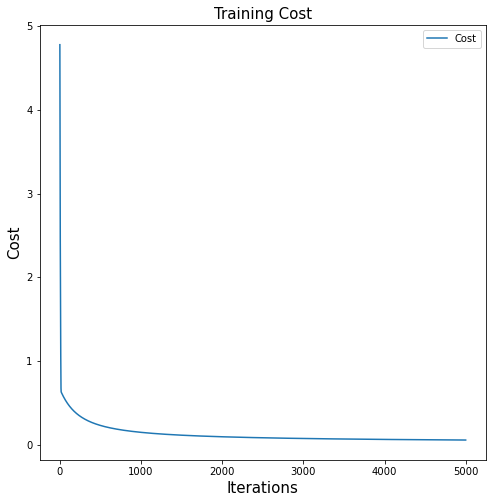

In [14]:
# Plot the graph
plt.figure(figsize=(8,8))
plt.title("Training Cost", fontsize=15)
plt.xlabel("Iterations", fontsize=15)
plt.ylabel("Cost", fontsize=15)
plt.plot(c, label="Cost")
plt.legend()

In [15]:
w

array([-4.91275255e-03, -7.25578070e-04,  1.57931449e+00, -1.16044262e+01])

As we can see in the weights only Radius and Bias have weights but other sin and cos value features have almost 0 weights

This means for the classification, only meaningful features being learnt by the Alogrithm

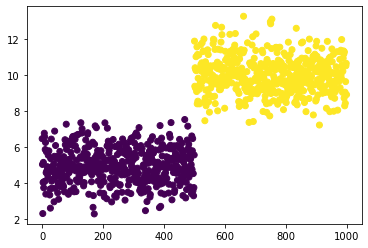

In [16]:
# Only Radius can Linerly separable using Logistic Regression (Linear Classifier)
plt.figure()
plt.scatter(np.arange(N),(X[:,2]), c=y) # Radius Column
plt.show()